In [2]:
from src.model import VGG19Model
from src.train import train_model
from src.load_data import load_and_preprocess_data, prepare_train_test_data
from src.evaluate import evaluate_model

In [4]:
vgg19 = VGG19Model(input_shape=(100, 100, 3), num_classes=5)
vgg19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [5]:
vgg19.compile_model()

In [ ]:
base_path = 'Database'
dataset_folder = 'train'  
image_size = 100  
image_data, label_data, label_names = load_and_preprocess_data(base_path, dataset_folder, image_size=image_size)

Loading MCI: 100%|██████████| 8002/8002 [01:08<00:00, 117.13it/s]


In [8]:
image_data.shape

(40077, 100, 100, 3)

In [9]:
test_size = 0.2  # 20% of data will be used for testing
random_state = 42 
X_train, X_test, Y_train, Y_test, label_names = prepare_train_test_data(image_data, label_data, test_size=test_size, random_state=random_state)

In [10]:
model_name = 'VGG19'
history = train_model(vgg19,X_train, Y_train, X_test, Y_test,model_name)

Epoch 1/50
3207/3207 [==============================] - 74s 21ms/step - loss: 3.1054 - auc: 0.8390 - val_loss: 2.4892 - val_auc: 0.8745
Epoch 2/50
3207/3207 [==============================] - 65s 20ms/step - loss: 2.4247 - auc: 0.8843 - val_loss: 2.4436 - val_auc: 0.8857
Epoch 3/50
3207/3207 [==============================] - 67s 21ms/step - loss: 2.2354 - auc: 0.8977 - val_loss: 4.0950 - val_auc: 0.8559
Epoch 4/50
3207/3207 [==============================] - 66s 21ms/step - loss: 2.1335 - auc: 0.9063 - val_loss: 3.8507 - val_auc: 0.8582
Epoch 5/50
3207/3207 [==============================] - 66s 21ms/step - loss: 2.1433 - auc: 0.9084 - val_loss: 2.2185 - val_auc: 0.9037
Epoch 6/50
3207/3207 [==============================] - 65s 20ms/step - loss: 2.0654 - auc: 0.9134 - val_loss: 3.1917 - val_auc: 0.8834
Epoch 7/50
3207/3207 [==============================] - 66s 21ms/step - loss: 2.0431 - auc: 0.9167 - val_loss: 2.9062 - val_auc: 0.8963
Epoch 8/50
3207/3207 [==========================

In [11]:
loss, accuracy = vgg19.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

1002/1002 [==============================] - 38s 36ms/step - loss: 1.0120 - auc: 0.9564
Train Loss:  1.0120385885238647
Train Accuracy:  0.9564104676246643


In [12]:
loss, accuracy = vgg19.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

251/251 [==============================] - 10s 39ms/step - loss: 2.1971 - auc: 0.9220
Test Loss:  2.197111129760742
Test Accuracy:  0.921986997127533


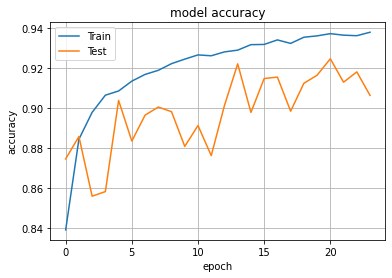

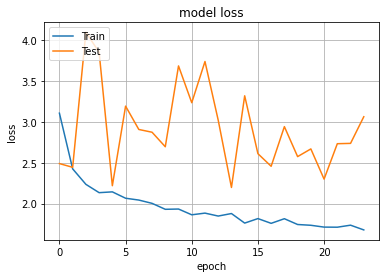

In [13]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1653
           1       0.91      0.88      0.90      1612
           2       0.73      0.82      0.77      1588
           3       0.76      0.71      0.73      1552
           4       0.85      0.90      0.87      1611

    accuracy                           0.83      8016
   macro avg       0.83      0.83      0.83      8016
weighted avg       0.83      0.83      0.83      8016



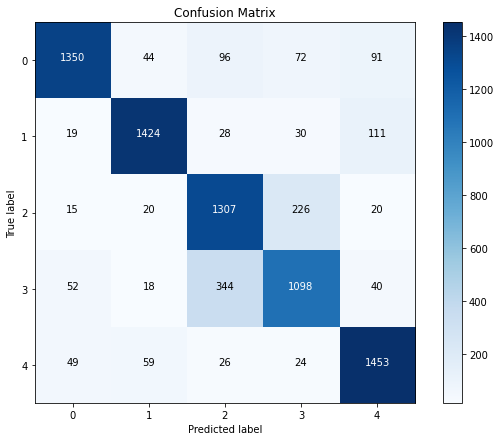

In [14]:
evaluate_model(vgg19, X_test, Y_test)